<a href="https://colab.research.google.com/github/Aishwarya1226/Online_Retail_Analysis/blob/main/Online_Retail_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
!pip install fireducks
!pip install openpyxl


In [8]:
%load_ext fireducks.pandas
import pandas as pd
from matplotlib import pyplot as plt

The fireducks.pandas extension is already loaded. To reload it, use:
  %reload_ext fireducks.pandas


In [9]:
!wget https://archive.ics.uci.edu/static/public/352/online+retail.zip

--2025-07-25 16:42:22--  https://archive.ics.uci.edu/static/public/352/online+retail.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘online+retail.zip.1’

online+retail.zip.1     [    <=>             ]  22.62M  27.4MB/s    in 0.8s    

2025-07-25 16:42:23 (27.4 MB/s) - ‘online+retail.zip.1’ saved [23715478]



In [ ]:
!unzip online+retail.zip

Archive:  online+retail.zip
replace Online Retail.xlsx? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [11]:
import time
stime=time.time()

In [12]:
df1=pd.read_excel('Online Retail.xlsx',dtype={'InvoiceNo':'string','StockCode':'string','Description':'string','Country':'string'})
df1=pd.concat([df1]*60)
df1.shape

(32514540, 8)

In [13]:
df1.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom


In [14]:
df1.info()

<class 'fireducks.pandas.frame.DataFrame'>
Index: 32514540 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Dtype         
---  ------       -----         
 0   InvoiceNo    object        
 1   StockCode    object        
 2   Description  object        
 3   Quantity     int64         
 4   InvoiceDate  datetime64[ns]
 5   UnitPrice    float64       
 6   CustomerID   float64       
 7   Country      object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 2.2+ GB


##Data cleaning and Missing Values


In [15]:
df1.isnull().sum()

InvoiceNo            0
StockCode            0
Description      87240
Quantity             0
InvoiceDate          0
UnitPrice            0
CustomerID     8104800
Country              0
dtype: int64

In [16]:
df1[df1.Description.isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,None,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,None,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,None,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,None,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,None,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535322,581199,84581,None,-2,2011-12-07 18:26:00,0.0,NaN,United Kingdom
535326,581203,23406,None,15,2011-12-07 18:31:00,0.0,NaN,United Kingdom
535332,581209,21620,None,6,2011-12-07 18:35:00,0.0,NaN,United Kingdom
536981,581234,72817,None,27,2011-12-08 10:33:00,0.0,NaN,United Kingdom


In [17]:
df1[df1.StockCode=="22139"].Description.mode()

0    RETROSPOT TEA SET CERAMIC 11 PC 
Name: Description, dtype: object

In [18]:
most_freq=df1[["StockCode","Description"]].value_counts().reset_index()
most_freq

,StockCode,Description,count
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,138120
1,22423,REGENCY CAKESTAND 3 TIER,132000
2,85099B,JUMBO BAG RED RETROSPOT,129540
3,47566,PARTY BUNTING,103620
4,20725,LUNCH BAG RED RETROSPOT,98280
...,...,...,...
4787,DCGS0069,ebay,60
4788,DCGS0070,CAMOUFLAGE DOG COLLAR,60
4789,DCGS0073,ebay,60
4790,gift_0001_20,to push order througha s stock was,60


In [19]:
most_freq[most_freq.StockCode=="85123A"].head(1)

,StockCode,Description,count
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,138120


In [20]:
most_freq.groupby("StockCode").head(1)

,StockCode,Description,count
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,138120
1,22423,REGENCY CAKESTAND 3 TIER,132000
2,85099B,JUMBO BAG RED RETROSPOT,129540
3,47566,PARTY BUNTING,103620
4,20725,LUNCH BAG RED RETROSPOT,98280
...,...,...,...
4785,DCGS0068,ebay,60
4786,DCGS0069,OOH LA LA DOGS COLLAR,60
4788,DCGS0070,CAMOUFLAGE DOG COLLAR,60
4789,DCGS0073,ebay,60


In [21]:
most_freq.columns=["StockCode","freq_Description","count"]
df2=df1.merge(most_freq,on="StockCode",how="left")
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,freq_Description,count
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,138120
1,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,CREAM HANGING HEART T-LIGHT HOLDER,540
2,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,?,60
3,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,wrongly marked carton 22804,60
4,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,WHITE METAL LANTERN,19680


In [22]:
df2['Description']=df2["freq_Description"]
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,freq_Description,count
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,138120
1,536365,85123A,CREAM HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,CREAM HANGING HEART T-LIGHT HOLDER,540
2,536365,85123A,?,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,?,60
3,536365,85123A,wrongly marked carton 22804,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,wrongly marked carton 22804,60
4,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,WHITE METAL LANTERN,19680


In [23]:
df2.isnull().sum()

InvoiceNo                  0
StockCode                  0
Description             6720
Quantity                   0
InvoiceDate                0
UnitPrice                  0
CustomerID          10271280
Country                    0
freq_Description        6720
count                   6720
dtype: int64

In [24]:
df2.dropna(subset=["Description"],inplace=True)
df2.isnull().sum()

InvoiceNo                  0
StockCode                  0
Description                0
Quantity                   0
InvoiceDate                0
UnitPrice                  0
CustomerID          10264560
Country                    0
freq_Description           0
count                      0
dtype: int64

In [25]:
df2.drop(columns=["freq_Description","count"],inplace=True)
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,85123A,CREAM HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
2,536365,85123A,?,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
3,536365,85123A,wrongly marked carton 22804,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
4,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [26]:
df2.describe()

,Quantity,UnitPrice,CustomerID
count,4.265514e+07,4.265514e+07,3.239058e+07
mean,9.718405e+00,4.410160e+00,1.529016e+04
std,1.941143e+02,8.452555e+01,1.709391e+03
min,-8.099500e+04,-1.106206e+04,1.234600e+04
25%,1.000000e+00,1.250000e+00,1.395600e+04
50%,3.000000e+00,2.100000e+00,1.515200e+04
75%,1.000000e+01,4.130000e+00,1.679100e+04
max,8.099500e+04,3.897000e+04,1.828700e+04


In [27]:
df2[df2.Quantity<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
196,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
209,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
304,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
305,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
306,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
42661388,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
42661610,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
42661611,C581568,21258,?,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
42661612,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [28]:
df2[df2.UnitPrice<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
391449,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
391450,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom
1102480,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
1102481,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom
1813511,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
40920217,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom
41631247,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
41631248,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom
42342278,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom


In [29]:
df3=df2[(df2.UnitPrice>0) & (df2.Quantity>0)]
df3.describe()

,Quantity,UnitPrice,CustomerID
count,4.163670e+07,4.163670e+07,3.164190e+07
mean,1.087389e+01,3.874301e+00,1.529680e+04
std,1.376693e+02,3.150752e+01,1.708784e+03
min,1.000000e+00,1.000000e-03,1.234600e+04
25%,1.000000e+00,1.250000e+00,1.396900e+04
50%,4.000000e+00,2.100000e+00,1.515900e+04
75%,1.200000e+01,4.130000e+00,1.679400e+04
max,8.099500e+04,1.354133e+04,1.828700e+04


In [30]:
df3.Quantity.quantile(0.999999)

np.float64(80995.0)

In [31]:
df3[df3.Quantity>1500]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
6336,536809,84950,ASSORTED COLOUR T-LIGHT HOLDER,1824,2010-12-02 16:48:00,0.55,15299.0,United Kingdom
6472,536830,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,2880,2010-12-02 17:38:00,0.18,16754.0,United Kingdom
33829,538420,17096,ASSORTED LAQUERED INCENSE HOLDERS,1728,2010-12-12 12:03:00,0.17,12875.0,United Kingdom
42702,539101,22693,GROW A FLYTRAP OR SUNFLOWER IN TIN,2400,2010-12-16 10:35:00,0.94,16029.0,United Kingdom
68298,540815,85123A,WHITE HANGING HEART T-LIGHT HOLDER,1930,2011-01-11 12:55:00,2.55,15749.0,United Kingdom
...,...,...,...,...,...,...,...,...
42623103,579498,23084,allocate stock for dotcom orders ta,2040,2011-11-29 15:52:00,1.79,12798.0,Japan
42623104,579498,23084,for online retail orders,2040,2011-11-29 15:52:00,1.79,12798.0,Japan
42623105,579498,23084,temp adjustment,2040,2011-11-29 15:52:00,1.79,12798.0,Japan
42623106,579498,23084,website fixed,2040,2011-11-29 15:52:00,1.79,12798.0,Japan


Feature Engineering:Create New Columns

In [32]:
df4=df3.copy()
df4['TotalPrice']=df4.Quantity*df4.UnitPrice
df4.head(3)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.3
1,536365,85123A,CREAM HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.3
2,536365,85123A,?,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.3


In [33]:
df4.info()

<class 'fireducks.pandas.frame.DataFrame'>
Index: 41636700 entries, 0 to 42661859
Data columns (total 9 columns):
 #   Column       Dtype         
---  ------       -----         
 0   InvoiceNo    object        
 1   StockCode    object        
 2   Description  object        
 3   Quantity     int64         
 4   InvoiceDate  datetime64[ns]
 5   UnitPrice    float64       
 6   CustomerID   float64       
 7   Country      object        
 8   TotalPrice   float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 3.1+ GB


In [34]:
df4['Month']=df4["InvoiceDate"].dt.month
df4.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Month
25806779,550522,22432,WATERING CAN PINK BUNNY,6,2011-04-19 10:04:00,1.95,12947.0,United Kingdom,11.70,4
41101130,574074,85123A,?,2,2011-11-02 15:33:00,5.79,NaN,United Kingdom,11.58,11
1626371,550313,23155,KNICKERBOCKERGLORY MAGNET ASSORTED,24,2011-04-17 11:21:00,0.83,12681.0,France,19.92,4
26739937,565917,23205,CHARLOTTE BAG VINTAGE ALPHABET,1,2011-09-07 16:15:00,1.63,NaN,United Kingdom,1.63,9
36016101,567898,22094,RED RETROSPOT TISSUE BOX,36,2011-09-22 16:20:00,0.39,13394.0,United Kingdom,14.04,9


##Visulization and EDA

## 1.Plot Monthly Sales

<function matplotlib.pyplot.show(close=None, block=None)>

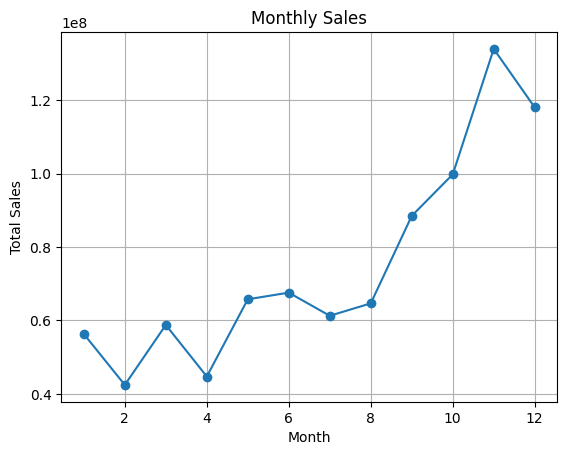

In [35]:
monthly_sales= df4.groupby("Month")["TotalPrice"].sum()
monthly_sales.plot(kind='line',title="Monthly Sales",marker="o")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.grid()
plt.show



## 2. Top 5 Counntries

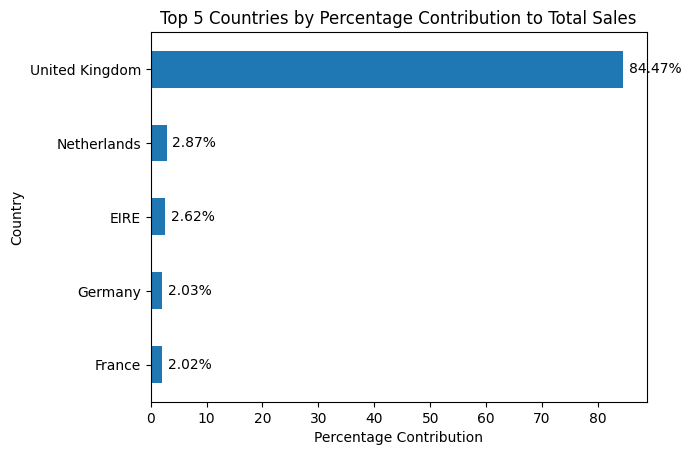

In [36]:
country_sales = df4.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False)
top_5_countries = country_sales.head(5)
total_sales = country_sales.sum()
top_5_percentage = (top_5_countries / total_sales) * 100

ax = top_5_percentage.plot(kind='barh', title='Top 5 Countries by Percentage Contribution to Total Sales')
plt.xlabel('Percentage Contribution')
plt.ylabel('Country')
plt.gca().invert_yaxis() # To display the highest percentage at the top

# Add percentage labels to the bars
for i, v in enumerate(top_5_percentage):
    ax.text(v + 1, i, f"{v:.2f}%", color='black', va='center')

plt.show()

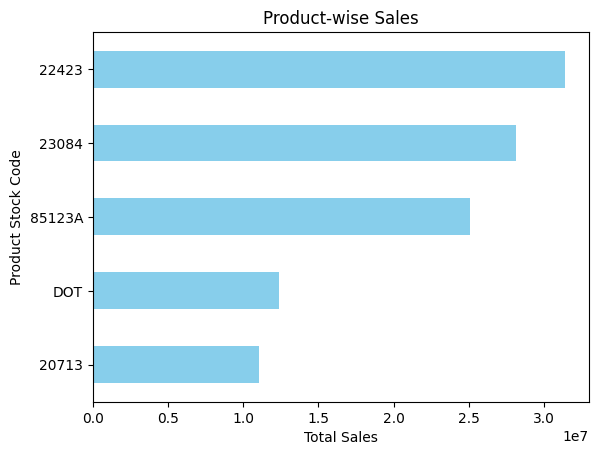

In [37]:
product_wise_sales= df4.groupby('StockCode')['TotalPrice'].sum()

top_5_products=product_wise_sales.sort_values(ascending=False).head(5)
top_5_products.plot(kind='barh',color='skyblue')
plt.title('Product-wise Sales')
plt.xlabel('Total Sales')
plt.ylabel('Product Stock Code')
plt.gca().invert_yaxis()
plt.show()

In [38]:
product_wise_sales.sort_values(ascending=False)

StockCode
22423     31407253.20
23084     28125295.80
85123A    25084512.00
DOT       12374926.20
20713     11054860.80
             ...     
90084           51.00
21268           50.40
51014c          49.80
84227           25.20
PADS             0.18
Name: TotalPrice, Length: 3922, dtype: float64

In [39]:
product_wise_sales.sum()

np.float64(901654436.04)

In [40]:
for stock_code in top_5_products.index:
    description=df4[df4.StockCode==stock_code].Description.iloc[0]
    print(f"{stock_code}==>{description}")

22423==>REGENCY CAKESTAND 3 TIER
23084==>RABBIT NIGHT LIGHT
85123A==>WHITE HANGING HEART T-LIGHT HOLDER
DOT==>DOTCOM POSTAGE
20713==>JUMBO BAG OWLS


## 4.RFM Analysis

In [41]:
current_dt= df4["InvoiceDate"].max()+pd.Timedelta(days=1)
current_dt

Timestamp('2011-12-10 12:50:00')

In [42]:
rfm=df4.groupby("CustomerID").agg({
    "InvoiceDate":lambda x: (current_dt-x.max()).days,
    "InvoiceNo":"count",
    "TotalPrice":"sum"
})
rfm.columns=['Recency','Frequency','Monetary']
rfm.head(5)

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,326,60,4631016.0
12347.0,2,13620,358272.6
12348.0,75,2040,115826.4
12349.0,19,5520,129951.6
12350.0,310,1140,21864.0


In [43]:
df4[df4.CustomerID==12347]["TotalPrice"].sum()

np.float64(358272.6)

In [44]:
rfm['R_segment']=pd.qcut(rfm['Recency'],4,labels=[4,3,2,1])
rfm['F_segment']=pd.qcut(rfm['Frequency'],4,labels=[1,2,3,4])
rfm['M_segment']=pd.qcut(rfm['Monetary'],4,labels=[1,2,3,4])
rfm['RFM_Score']=rfm[['R_segment','F_segment','M_segment']].sum(axis=1)
rfm.head()


,Recency,Frequency,Monetary,R_segment,F_segment,M_segment,RFM_Score
CustomerID,,,,,,,
12346.0,326,60,4631016.0,1,1,4,6
12347.0,2,13620,358272.6,4,4,4,12
12348.0,75,2040,115826.4,2,2,3,7
12349.0,19,5520,129951.6,3,3,3,9
12350.0,310,1140,21864.0,1,1,1,3


In [45]:
rfm.sort_values('RFM_Score',ascending=False)

,Recency,Frequency,Monetary,R_segment,F_segment,M_segment,RFM_Score
CustomerID,,,,,,,
12347.0,2,13620,358272.6,4,4,4,12
12362.0,3,19800,382491.6,4,4,4,12
12417.0,3,15240,292099.8,4,4,4,12
12423.0,1,9540,160854.6,4,4,4,12
12433.0,1,32160,1108356.0,4,4,4,12
...,...,...,...,...,...,...,...
18224.0,264,1020,16815.0,1,1,1,3
18227.0,218,300,5625.0,1,1,1,3
18269.0,366,720,16452.0,1,1,1,3


Customer Churn Analysis

In [46]:
df4.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.3,12
1,536365,85123A,CREAM HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.3,12


In [47]:
customer_last_purchase=df4.groupby("CustomerID")['InvoiceDate'].max()
customer_last_purchase.head(5)

CustomerID
12346.0   2011-01-18 10:01:00
12347.0   2011-12-07 15:52:00
12348.0   2011-09-25 13:13:00
12349.0   2011-11-21 09:51:00
12350.0   2011-02-02 16:01:00
Name: InvoiceDate, dtype: datetime64[ns]

In [48]:
type(customer_last_purchase)

fireducks.pandas.series.Series

In [49]:
current_dt

Timestamp('2011-12-10 12:50:00')

In [50]:
customer_last_purchase=(current_dt - customer_last_purchase).dt.days
customer_last_purchase.head(5)

CustomerID
12346.0    326
12347.0      2
12348.0     75
12349.0     19
12350.0    310
Name: InvoiceDate, dtype: int64

In [51]:
churn_threshold=90
churned_customers=customer_last_purchase[customer_last_purchase>churn_threshold]
churned_customers.head(5)

CustomerID
12346.0    326
12350.0    310
12353.0    204
12354.0    232
12355.0    214
Name: InvoiceDate, dtype: int64

Number of Churned Customers: 1449


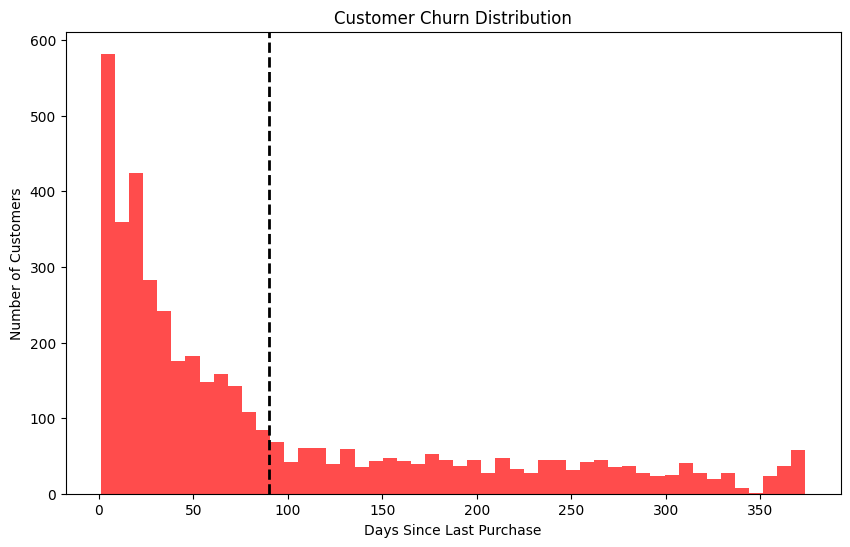

In [52]:
print("Number of Churned Customers:",len(churned_customers))
plt.figure(figsize=(10,6))
plt.hist(customer_last_purchase,bins=50,color='red',alpha=0.7)
plt.axvline(churn_threshold,color='black',linestyle='dashed',linewidth=2)
plt.title('Customer Churn Distribution')
plt.xlabel('Days Since Last Purchase')
plt.ylabel('Number of Customers')
plt.show()

In [53]:
print(f"[{pd.__name__}] total time taken: {time.time() - stime}sec")

[fireducks.pandas] total time taken: 100.16680598258972sec
